In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import HTML
import plotly as py
import warnings

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [7]:
df=pd.read_csv('C:\\Users\\shaan\\OneDrive\\Desktop\\Scotch-whisky\\scotch_review.csv')

In [8]:
df

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
...,...,...,...,...,...,...,...
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."


In [9]:
df.shape

(2247, 7)

In [10]:
df.isnull().sum() #finding missing value

Unnamed: 0      0
name            0
category        0
review.point    0
price           0
currency        0
description     0
dtype: int64

In [11]:
col=df.columns
nunique=df.nunique()
nul = df.isnull().sum()
typ = df.dtypes
nuniq = pd.DataFrame({'column_name':col,'no. of Unique Values':nunique,'Missing Values':nul,'Class Type':df.dtypes})
nuniq.reset_index(drop=True)

,column_name,no. of Unique Values,Missing Values,Class Type
0,Unnamed: 0,2247,0,int64
1,name,2223,0,object
2,category,5,0,object
3,review.point,29,0,int64
4,price,632,0,object
5,currency,1,0,object
6,description,2245,0,object


In [12]:
print(df['Unnamed: 0'])
# These all are the unique numbers 
#so let us rename this column
df=df.rename(columns={'Unnamed: 0':'ID'})
df

0          1
1          2
2          3
3          4
4          5
        ... 
2242    2243
2243    2244
2244    2245
2245    2246
2246    2247
Name: Unnamed: 0, Length: 2247, dtype: int64


,ID,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
...,...,...,...,...,...,...,...
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."


In [13]:
df['currency']

0       $
1       $
2       $
3       $
4       $
       ..
2242    $
2243    $
2244    $
2245    $
2246    $
Name: currency, Length: 2247, dtype: object

In [14]:
df = df.drop(['currency'],axis=1)

In [15]:
df.head()

,ID,name,category,review.point,price,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."


In [16]:
print(df['category'].head())
print('\n\n Type of class of this feature is :',df.category.dtype)
print('\n\n number of unique category : ',df.category.nunique())
df.category.unique()

0         Blended Scotch Whisky
1            Single Malt Scotch
2            Single Malt Scotch
3    Blended Malt Scotch Whisky
4    Blended Malt Scotch Whisky
Name: category, dtype: object


 Type of class of this feature is : object


 number of unique category :  5


array(['Blended Scotch Whisky', 'Single Malt Scotch',
       'Blended Malt Scotch Whisky', 'Grain Scotch Whisky',
       'Single Grain Whisky'], dtype=object)

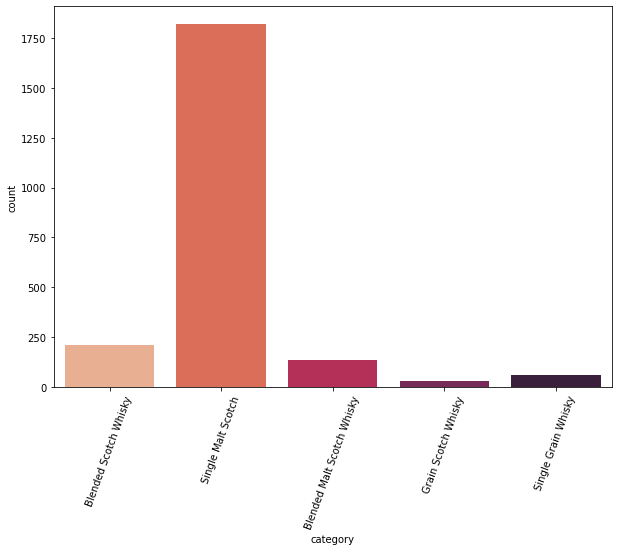

In [17]:
plt.figure(figsize=(10,7))
a=sns.countplot(df['category'],palette='rocket_r')
_=plt.xticks(rotation=70)
plt.show()

In [18]:
print('Class type of the column \t',df['review.point'].dtype)
print('number of the unique values : ',df['review.point'].nunique())
print("\n Let's check out the range of points given\t",df['review.point'].min(),"-",df['review.point'].max())

Class type of the column 	 int64
number of the unique values :  29

 Let's check out the range of points given	 63 - 97


In [19]:
def fig(length,width):
    plt.figure(figsize=(length,width))

def setit(x):
    _=plt.xticks(rotation=x)
    plt.show()

<Figure size 720x360 with 0 Axes>

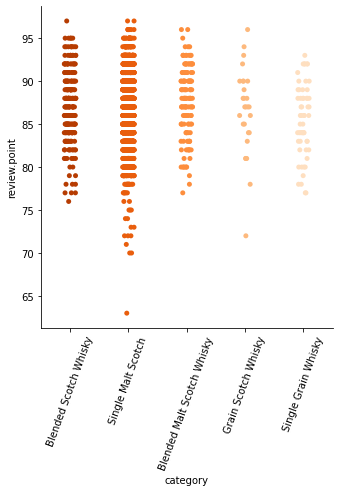

In [20]:
fig(10,5)
sns.catplot('category','review.point',data=df,palette='Oranges_r')
setit(70)

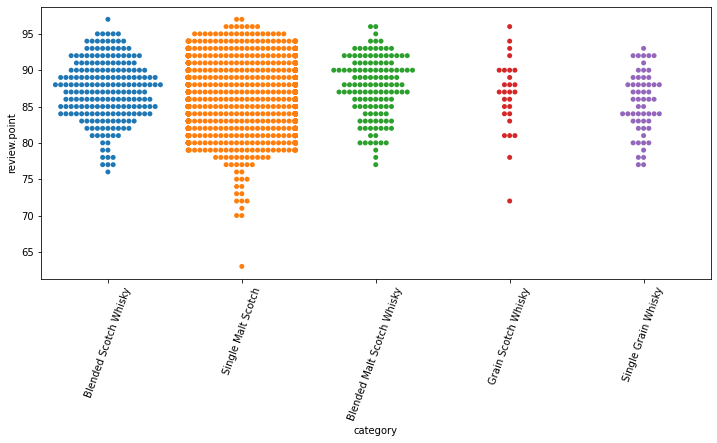

In [21]:
fig(12,5)
sns.swarmplot(x=df['category'],y=df['review.point'])
setit(70)

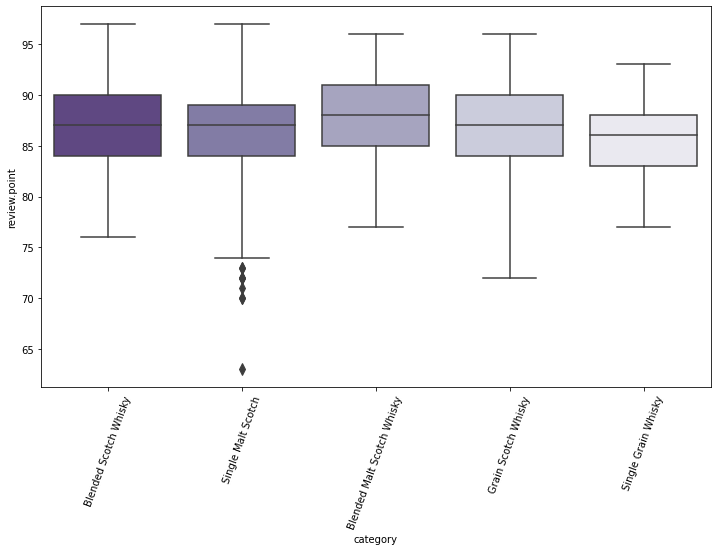

In [22]:
fig(12,7)
sns.boxplot(x=df['category'],y=df['review.point'],data=df,palette='Purples_r',saturation=.6,fliersize=8,whis=2)
setit(70)

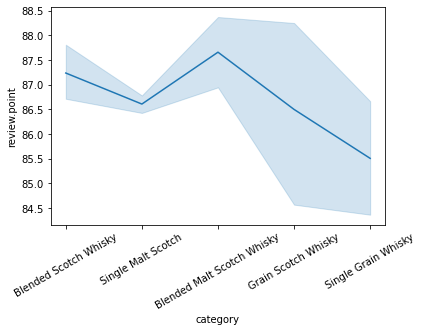

In [23]:
sns.lineplot('category','review.point',data=df)
setit(30)

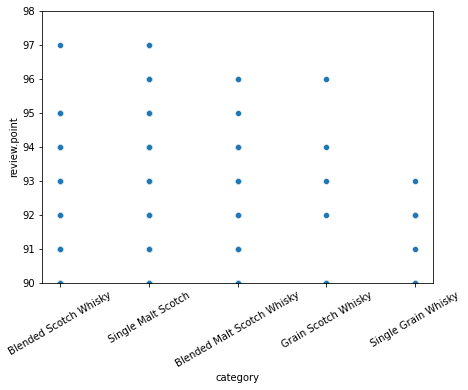

In [24]:
fig(7,5)
sns.scatterplot('category','review.point',data=df)
plt.ylim(90,98)
setit(30)

In [25]:
int_price=[]

# finding out the complications in the column
for i in df['price']:
    #removing $ and , so that we can convert this feature price into integer type
    _=re.sub(r'[$,]+','',i)
    #converting float integrs
    x=re.sub(r'\W\d\d','',_)
    z=0
    #converting liter into one botle price
    if ("/l" in x):
        l=re.sub(r'[/l]\w+','',x)
        
        z=int(l)
        z=z*.75
        int_price.append(z)
        
    # if any of the alphanumeric value like space like we encountered the case : ('$15,000 or $60,000/set')     
    elif(" " in  x):
        l= re.sub(r'[ ]\w+\W+\w+','',x)
        z=int(l)
        int_price.append(z)
            
    elif ("set" in x):
        l=re.sub(r'[/]\w+','',x)
        
        z= int(l)
        z=z/4
        int_price.append(z)
    else :
        z=int(x)
        int_price.append(z)
#print(int_price)   

In [26]:
df['price'] = int_price

In [27]:
df['price'].dtype

dtype('float64')

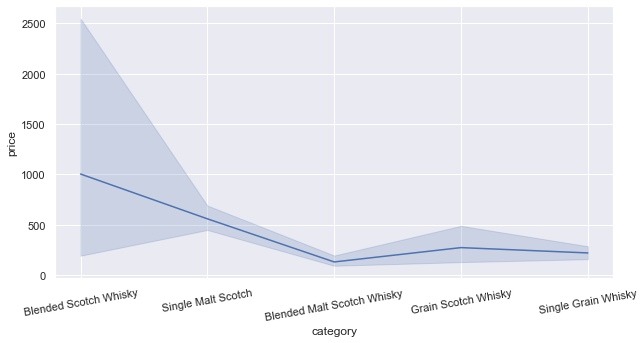

In [28]:
fig(10,5)
sns.set(color_codes=True)
sns.lineplot(df['category'],df['price'],data=df)
setit(10)

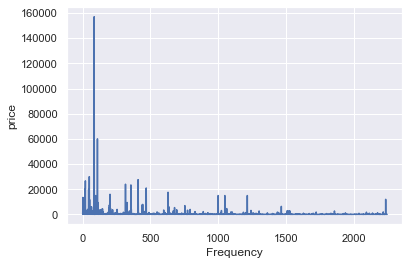

In [30]:
sns.set(color_codes=True)
sns.lineplot(y=df.price, x=df.index , data=df)
plt.xlabel('Frequency');

(0.0, 15000.0)

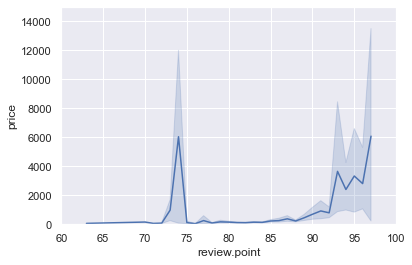

In [31]:
sns.lineplot(df['review.point'],df['price'],data=df)
plt.xlim(60,100)
plt.ylim(0,15000)

<Figure size 864x504 with 0 Axes>

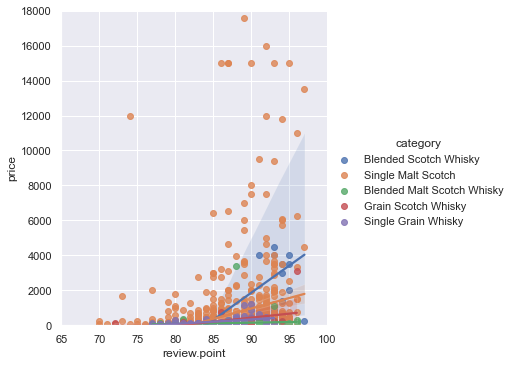

In [32]:
fig(12,7)
sns.lmplot('review.point','price',data=df,hue='category')
_=plt.xlim(65,100)
_=plt.ylim(0,18000)

In [33]:
df.sort_values(by = 'review.point' , ascending = False)[['name','category','review.point','price' ]].head(15)

,name,category,review.point,price
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0
8,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.0
11,"Macallan 1976 Vintage, 29 year old, cask #1135...",Single Malt Scotch,96,1500.0
10,"The Glenlivet Cellar Collection, 1969 vintage,...",Single Malt Scotch,96,750.0
9,"Glenfarclas Family Casks 1954 Cask #1260, 47.2%",Single Malt Scotch,96,3360.0
12,The Last Drop (distilled at Lochside) 1972 (ca...,Grain Scotch Whisky,96,3108.0
7,"Bowmore, 40 year old, 44.8%",Single Malt Scotch,96,11000.0
6,"Gold Bowmore, 1964 vintage, 42.4%",Single Malt Scotch,96,6250.0


In [34]:
avp=df['price'].mean()
avr=df['review.point'].mean()
print('Average price of all the scotch in data set is: \t',avp)
print('Average review point of all the scotch in data set is: \t',avr)

Average price of all the scotch in data set is: 	 563.0057854917668
Average review point of all the scotch in data set is: 	 86.70004450378282


In [35]:
# scotch under $50 with review point above 90
_50=df[(df['review.point'] > 90) & (df['price'] < 50)]
_50

,ID,name,category,review.point,price,description
87,88,"Black Bottle, 10 year old, 43%",Blended Scotch Whisky,93,34.0,Black Bottle is unique in that it combines sev...
119,120,"Glenmorangie Original, 10 year old, 43%",Single Malt Scotch,93,45.0,"Fresh, vibrant, and beautifully complex. A cle..."
265,266,"Big Peat Small Batch, 53.6%",Blended Malt Scotch Whisky,92,48.0,The original Big Peat was a mix of smoky Islay...
280,281,"Compass Box Great King Street Artist's Blend, 43%",Blended Scotch Whisky,91,45.0,After a series of esoteric and expensive relea...


In [36]:
#scotch under $100 with rating above 95
_100=df[(df['review.point'] > 95) & (df['price'] < 100)]
_100

,ID,name,category,review.point,price,description
5,6,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.0,"Powerful, muscular, well-textured, and invigor..."


In [37]:
#scotch above $100 but review point below 76
#worst scotch in the list
_100_=df[(df['review.point'] < 76) & (df['price'] > 100)]
_100_

,ID,name,category,review.point,price,description
2234,2235,"Knockando 25 year old Special Release 2011, 43%",Single Malt Scotch,75,220.0,What a contrast with the standard bottling. He...
2236,2237,"The Macallan Lalique Decanter, 55 year old, 40.1%",Single Malt Scotch,74,12000.0,"Deep, thick nose, with sappy oak, dried citrus..."
2237,2238,"Signatory (distilled at Kinclaith), Cask #3014...",Single Malt Scotch,73,1700.0,This Lowland distillery only operated from 195...
2238,2239,"Gordon & MacPhail (distilled at Port Ellen), 1...",Single Malt Scotch,73,250.0,Port Ellen is going to just keep getting rarer...
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.0,"Its best attributes are vanilla, toasted cocon..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.0,"The sherry is very dominant and cloying, which..."


In [38]:
# avp/avr ratio
# df['ratio'] will show us the
ratio = df['price']/df['review.point']
z=pd.DataFrame({'name':df['name'],'marks':df['review.point'],'price':df['price'],'category':df['category'],'ratio':ratio})

In [39]:
#Scotch that gives good value for money
#price efficient scotch
z[z['ratio']<.2]

,name,marks,price,category,ratio
970,"Carlyle, 40%",88,13.0,Single Malt Scotch,0.147727
1780,"Jamie Stewart, 40%",84,16.0,Blended Scotch Whisky,0.190476
2000,"Monarch of The Glen 8 year old, 40%",82,15.0,Blended Scotch Whisky,0.182927
2073,"Sir Edward’s Blended Whisky, 40%",81,14.0,Blended Scotch Whisky,0.172840
2074,"Monarch of the Glen, 40%",81,12.0,Blended Scotch Whisky,0.148148
2167,"MacQueen’s 3 year old, 40%",80,13.0,Blended Scotch Whisky,0.162500
2198,"High Commissioner, 40%",79,15.0,Blended Scotch Whisky,0.189873
2227,"Clansman, 40%",77,14.0,Blended Scotch Whisky,0.181818


(0.0, 0.00115)

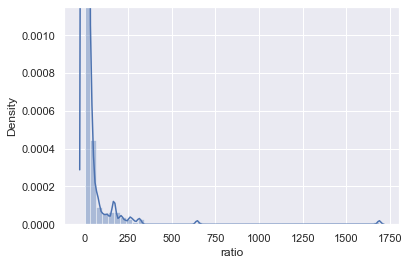

In [40]:
sns.distplot(z['ratio'])
plt.ylim(0,0.00115)

In [41]:
#Now working over the text data
#Name
df['name'].head(5)

0                     Johnnie Walker Blue Label, 40%
1    Black Bowmore, 1964 vintage, 42 year old, 40.5%
2        Bowmore 46 year old (distilled 1964), 42.9%
3                     Compass Box The General, 53.4%
4                            Chivas Regal Ultis, 40%
Name: name, dtype: object

In [42]:
#clearing the unwanted string present in ()
clean = []
for i in df.name:
    if ("(" in i):
        x  =re.sub( r'\([^)]*\)','',i )
        clean.append(x)
    else : 
        clean.append(i)

In [43]:
df['name'] = clean
#remove head() and take the insight of name
df['name'].head()
review=df.copy()

In [44]:
# finding the alchohol content percentage of each of the bottle of scotch
alc=[]
for i in df['name']:
    per = re.findall(r'(\d\d\W?\d?%)',i)
    if (len(per) == 0):
        _ = float('NaN')
        alc.append(_)
    else:
        if(len(per)==2):
            __=re.sub('%','',per[1])
            _=float(__)
            alc.append(_)
        else:
            __ = re.sub('%','',per[0])
            _ = float(__)
            alc.append(_)

In [45]:
df['percentage']=alc

In [46]:
clean =[]
# removing the alchohol percentage from name
for i in df['name']:
    _ = re.sub(r'(\d\d\W?\d?%)','',i)
    clean.append(_)
df['name']=clean

In [47]:
# finding the age of the bottle
age=[]
for i in df['name']:
    yod = re.findall('\d\d? year old',i)
    if (len(yod) == 1):
        __ = re.findall('\d\d?',yod[0])
        ag=int(__[0])
        age.append(ag)
    else:
        __ = re.findall(' \d\d\d\d ',i)
        if (len(__)== 1):
            _=int(__[0])
            ag=2020-_
            if (ag>200):
                ag=float("NaN")
                age.append(ag)
            else :
                age.append(ag)
        else:
            ag=float('NaN')
            age.append(ag)

In [48]:
df['age'] = age

In [49]:
clean=[]
#removing the age
for i in df['name']:
    _ = re.sub(' \d\d? year old','',i)
    clean.append(_)
df['name'] = clean    

In [50]:
#final cleaning of df['name']
clean=[]
for i in df['name']:
    i=re.sub(r'[,]+','',i)
    i=re.sub(r'  ',' ',i)
    clean.append(i)
df['name'] = clean

In [51]:
#Now we have a new data set

In [52]:
df

,ID,name,category,review.point,price,description,percentage,age
0,1,Johnnie Walker Blue Label,Blended Scotch Whisky,97,225.0,"Magnificently powerful and intense. Caramels, ...",40.0,NaN
1,2,Black Bowmore 1964 vintage,Single Malt Scotch,97,4500.0,What impresses me most is how this whisky evol...,40.5,42.0
2,3,Bowmore,Single Malt Scotch,97,13500.0,There have been some legendary Bowmores from t...,42.9,46.0
3,4,Compass Box The General,Blended Malt Scotch Whisky,96,325.0,With a name inspired by a 1926 Buster Keaton m...,53.4,NaN
4,5,Chivas Regal Ultis,Blended Malt Scotch Whisky,96,160.0,"Captivating, enticing, and wonderfully charmin...",40.0,NaN
...,...,...,...,...,...,...,...,...
2242,2243,Duncan Taylor Cask #3583,Grain Scotch Whisky,72,125.0,"Its best attributes are vanilla, toasted cocon...",54.4,28.0
2243,2244,Distillery Select 'Craiglodge' 1998 vintage,Single Malt Scotch,71,60.0,"Aged in a sherry cask, which adds sweet notes ...",45.0,8.0
2244,2245,Edradour Barolo Finish,Single Malt Scotch,70,80.0,"Earthy, fleshy notes with brooding grape notes...",57.1,11.0
2245,2246,Highland Park Cask #7380 1981 vintage,Single Malt Scotch,70,225.0,"The sherry is very dominant and cloying, which...",55.0,25.0


In [53]:
#Scotch with highest alchohol content
df.sort_values(by = 'percentage' , ascending = False)[['name','category','review.point','price','age','percentage' ]].head(5)

,name,category,review.point,price,age,percentage
2011,Adelphi,Single Malt Scotch,82,135.0,7.0,67.4
1560,Wemyss Malts Fruit Bonbons 1989,Single Malt Scotch,85,137.0,NaN,66.0
817,Caol Ila 'Unpeated Style',Single Malt Scotch,88,60.0,10.0,65.8
1720,Single Malts of Scotland 1988,Single Malt Scotch,84,150.0,NaN,64.2
1453,Octomore Islay Barley 2009,Single Malt Scotch,85,239.0,NaN,64.0


In [54]:
#Scotch with lowest price
df.sort_values(by = 'price' , ascending = False)[['name','category','review.point','price','age','percentage' ]].tail(5)

,name,category,review.point,price,age,percentage
2227,Clansman,Blended Scotch Whisky,77,14.0,NaN,40.0
2073,Sir Edward’s Blended Whisky,Blended Scotch Whisky,81,14.0,NaN,40.0
970,Carlyle,Single Malt Scotch,88,13.0,NaN,40.0
2167,MacQueen’s,Blended Scotch Whisky,80,13.0,3.0,40.0
2074,Monarch of the Glen,Blended Scotch Whisky,81,12.0,NaN,40.0


In [55]:
#Scotch with highest price
df.sort_values(by = 'price' , ascending = False)[['name','category','review.point','price','age','percentage' ]].head(5)

,name,category,review.point,price,age,percentage
85,Diamond Jubilee by John Walker & Sons,Blended Scotch Whisky,93,157000.0,NaN,42.5
109,Dalmore,Single Malt Scotch,93,60000.0,50.0,40.0
49,Bowmore 1966,Single Malt Scotch,94,30000.0,50.0,41.5
409,Balvenie DCS Compendium 1st Chapter 1968,Single Malt Scotch,90,27620.0,46.0,45.9
20,Bowmore,Single Malt Scotch,95,26650.0,50.0,40.7
